In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch


In [86]:
apartment_df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/refs/heads/main/apartments_for_rent.csv")
apartment_df.shape

(9998, 13)

In [4]:
max_square_feet = apartment_df["square_feet"].max()
max_price = apartment_df["price"].max()
print("Max Square feet", max_square_feet)
print("Max Price", max_price)

Max Square feet 40000
Max Price 52500


In [5]:
min_square_feet = apartment_df["square_feet"].min()
min_price = apartment_df["price"].min()
print("min Square feet", min_square_feet)
print("min Price", min_price)

min Square feet 101
min Price 200


In [6]:
average_price = apartment_df["price"].mean()
print("average price", average_price)

average price 1486.391278255651


In [7]:
bedrooms = apartment_df["bedrooms"]
bathrooms = apartment_df["bathrooms"]

<Axes: xlabel='bathrooms', ylabel='count'>

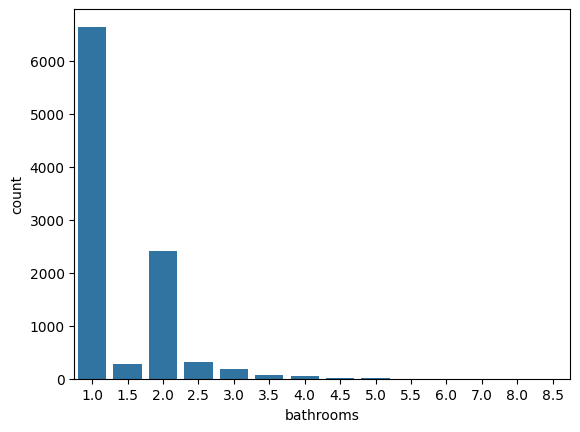

In [8]:
sns.countplot(x=bathrooms)


<Axes: xlabel='bedrooms', ylabel='count'>

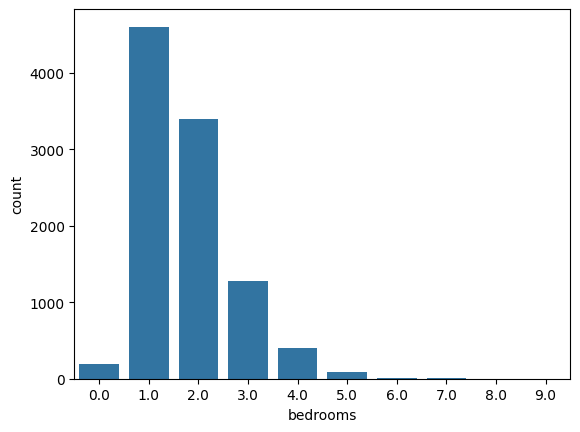

In [9]:
sns.countplot(x=bedrooms)


The number of apartments with different amounts of bedrooms and bathrooms are not even close to being normally distributed.
Most common amount of each:
Bedrooms: 1 br
Bathrooms: 1 bath
I think that these distributions are heavy for single bed/bath becuase apartments typically don't house families, the small living space is suited more towards lower numbered tenants.


In [10]:
square_feet = apartment_df["square_feet"]
price = apartment_df["price"]

<Axes: xlabel='square_feet', ylabel='Count'>

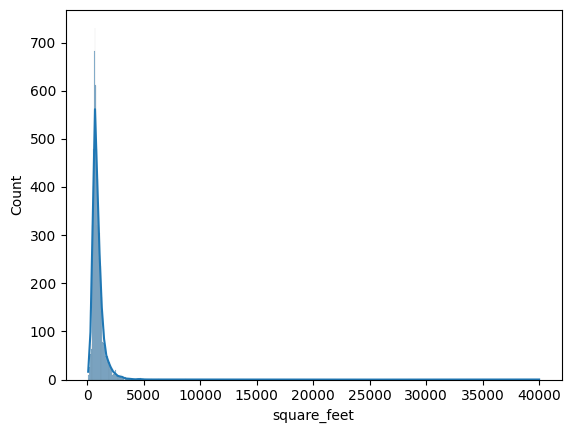

In [11]:
sns.histplot(x=square_feet, kde=True)

<Axes: xlabel='price', ylabel='Count'>

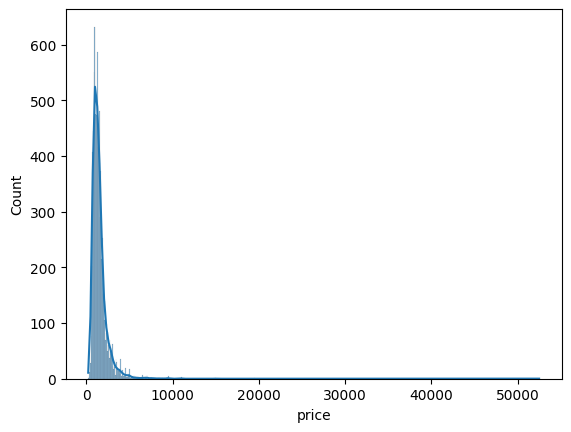

In [12]:
sns.histplot(x=price, kde=True)

The distributions appear to be not normal and right skewed, i.e. there are outliers all the way to the high end of each histogram. The majority of the apartments are within the left most end of each histogram. This looks like there are a lot more cheap and small apartments, rather than more expensive and large apartments. This aligns with the histograms earlier, where there are more single person apartments.

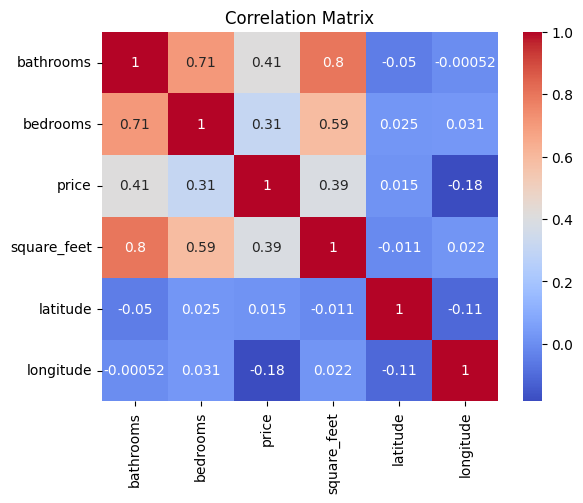

In [13]:
all_features = ["title","body","amenities","bathrooms","bedrooms","pets_allowed","price","square_feet","cityname","state","latitude","longitude","source"]
exc_feat = ["title","body","amenities","pets_allowed","cityname","state","source"]
inc_feat = ["bathrooms","bedrooms","price","square_feet", "latitude","longitude"]

sns.heatmap(apartment_df[inc_feat].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

I chose to include the following features: bathrooms, bedrooms, price, square_feet, latitude, longitude
I felt that each of these metrics should be included in the correlation heat map because they are quantitative. 
Bedrooms, bathrooms, and square feet are strongly correlated in a positive direction. These correlations exist because each of these bathrooms and bedrooms are directly related to square_feet. The more bathrooms and bedrooms in an apartment, the more square feet an apartment is. This shows that for future analysis, only of these features should be used, otherwise it's colinearity is going to mislead the analysis.

In [14]:
# For evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
from sklearn.model_selection import train_test_split


In [308]:
# Normalize square_feet
mean = square_feet.mean()
std = square_feet.std()
square_feet_normalized = (square_feet - mean) / std

In [309]:
# Normalize price
mean = price.mean()
std = price.std()
price_normalized = (price - mean) / std

In [310]:
# x = np.array(square_feet_normalized)
# y = np.array(price_normalized)
x = np.array(square_feet)
y = np.array(price)

In [311]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [312]:
x = torch.Tensor(X_train)
y = torch.Tensor(y_train)

In [313]:
# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 8e-7

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.Tensor([1.0]).float()
m.requires_grad = True
b = torch.Tensor([1.0]).float()
b.requires_grad = True

# Gradient descent update loop
for epoch in range(1000):
    # forward pass
    y_pred = m*x + b
    # compute loss
    loss_tensor = (y_pred - y) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print("epoch:", epoch, "m=", m.item(), "b=", b.item(), "loss=", loss.item())

epoch: 0 m= 1.8208590745925903 b= 1.0008807182312012 loss= 1305484.5
epoch: 20 m= 1.4694749116897583 b= 1.005049467086792 loss= 1083944.75
epoch: 40 m= 1.438279151916504 b= 1.0094748735427856 loss= 1082197.75
epoch: 60 m= 1.4355065822601318 b= 1.013922929763794 loss= 1082182.5
epoch: 80 m= 1.4352571964263916 b= 1.018372893333435 loss= 1082181.375
epoch: 100 m= 1.4352319240570068 b= 1.0228229761123657 loss= 1082179.875
epoch: 120 m= 1.4352262020111084 b= 1.0272727012634277 loss= 1082178.75
epoch: 140 m= 1.4352226257324219 b= 1.031721591949463 loss= 1082177.625
epoch: 160 m= 1.4352190494537354 b= 1.036170482635498 loss= 1082176.375
epoch: 180 m= 1.4352154731750488 b= 1.0406193733215332 loss= 1082175.0
epoch: 200 m= 1.4352118968963623 b= 1.0450682640075684 loss= 1082173.875
epoch: 220 m= 1.4352083206176758 b= 1.0495171546936035 loss= 1082172.625
epoch: 240 m= 1.4352047443389893 b= 1.0539660453796387 loss= 1082171.25
epoch: 260 m= 1.4352011680603027 b= 1.0584149360656738 loss= 1082170.25
e

<Axes: xlabel='x', ylabel='value'>

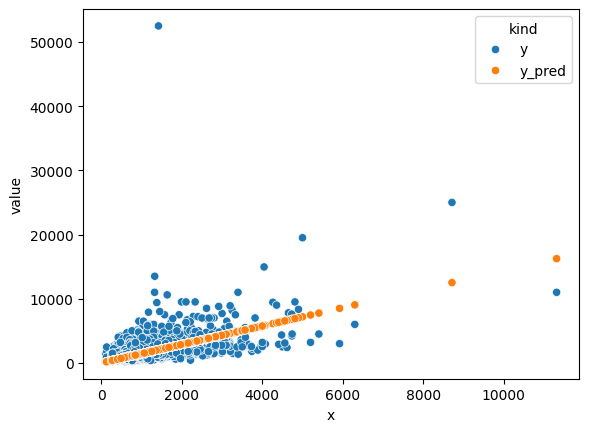

In [314]:
df = pd.DataFrame(np.array([x.detach().numpy(),y.detach().numpy(),y_pred.detach().numpy()]).T,columns=["x","y","y_pred"], index=x.detach().numpy())
dfm = df.melt("x",var_name="kind")
sns.scatterplot(data=dfm,x="x",y="value",hue="kind")

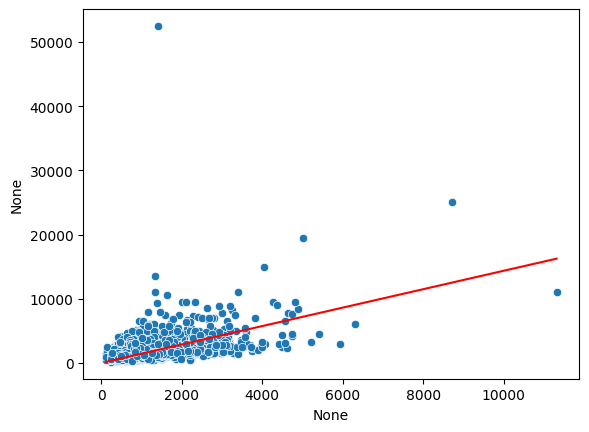

In [315]:
sns.scatterplot(x=x,y=y)
y_intercept =  b.detach().numpy()
slope =  m.detach().numpy()
x = x.detach().numpy()
y = y.detach().numpy()
x_min, x_max = x.min(), x.max()
plt.plot([x_min, x_max], [slope * x_min + y_intercept, slope * x_max + y_intercept], color="red")


I chose square feet as my input because it is qualitative, and I felt that it was a solid linear regression to explore as a simple baseline. 
I normalized both price and square feet by finding their z scores. 
For an un-normalized equation: price = 1.26*x + 1.05,  with a learning rate of 1e-7 that converges at loss= 1232406.5
The loss looks very large because the scales are orders of magnitude different between price and square feet

In [316]:
# X_test = torch.tensor(X_test)
with torch.no_grad():
    y_test_pred = m * X_test + b

y_true = y_test
y_pred = y_test_pred.detach().numpy()

C:\Users\brock\AppData\Local\Temp\ipykernel_35804\3326911810.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_test_pred = m * X_test + b


In [317]:
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 2016290.4587439245
MAE: 563.4497451506853
R²: -1.8859390988606912


Mean squared error is showing that the predictions are off by a $1,100 to $1,200 squared, large but not terrible for un-normalized data.
Mean absolute error is showing that the predictions are off by $565 on average.
Portion of variance explained by model is negative and large. This is not good. This means the model is worse than simply predicting the mean price for every house.

In [318]:
x = np.array(square_feet_normalized)
y = np.array(price_normalized)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x = torch.Tensor(X_train)
y = torch.Tensor(y_train)

# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 0.01

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.Tensor([1.0]).float()
m.requires_grad = True
b = torch.Tensor([1.0]).float()
b.requires_grad = True

# Gradient descent update loop
for epoch in range(1000):
    # forward pass
    y_pred = m*x + b
    # compute loss
    loss_tensor = (y_pred - y) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print("epoch:", epoch, "m=", m.item(), "b=", b.item(), "loss=", loss.item())

epoch: 0 m= 0.9946302771568298 b= 0.9802138805389404 loss= 1.9531279802322388
epoch: 20 m= 0.9009368419647217 b= 0.6579316258430481 loss= 1.3655198812484741
epoch: 40 m= 0.8291041254997253 b= 0.4427409768104553 loss= 1.0971500873565674
epoch: 60 m= 0.7740426659584045 b= 0.2990530729293823 loss= 0.9737446308135986
epoch: 80 m= 0.7318440079689026 b= 0.20310689508914948 loss= 0.9165204167366028
epoch: 100 m= 0.6995083093643188 b= 0.1390378326177597 loss= 0.8897129893302917
epoch: 120 m= 0.6747336387634277 b= 0.0962536409497261 loss= 0.8770017027854919
epoch: 140 m= 0.6557542085647583 b= 0.06768199801445007 loss= 0.8708891272544861
epoch: 160 m= 0.6412157416343689 b= 0.04860076308250427 loss= 0.8679028749465942
epoch: 180 m= 0.6300802230834961 b= 0.03585696220397949 loss= 0.8664180636405945
epoch: 200 m= 0.621551513671875 b= 0.027345243841409683 loss= 0.865666389465332
epoch: 220 m= 0.6150198578834534 b= 0.02165979892015457 loss= 0.8652786612510681
epoch: 240 m= 0.6100181937217712 b= 0.017

<Axes: xlabel='x', ylabel='value'>

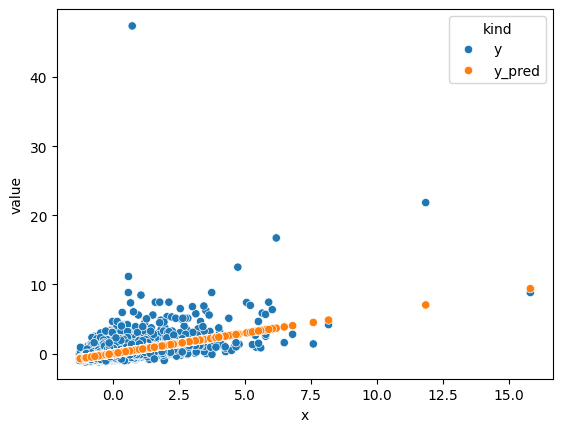

In [319]:
df = pd.DataFrame(np.array([x.detach().numpy(),y.detach().numpy(),y_pred.detach().numpy()]).T,columns=["x","y","y_pred"], index=x.detach().numpy())
dfm = df.melt("x",var_name="kind")
sns.scatterplot(data=dfm,x="x",y="value",hue="kind")

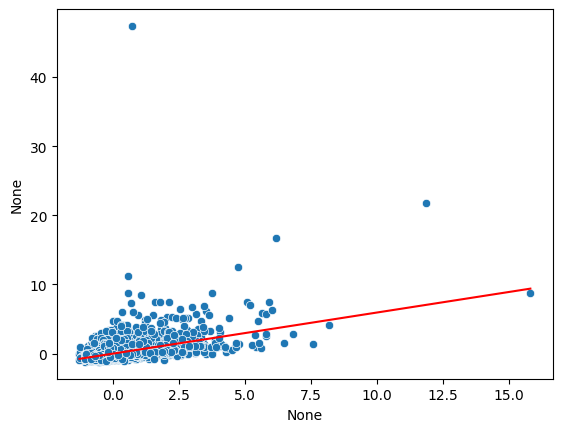

In [320]:
sns.scatterplot(x=x,y=y)
y_intercept =  b.detach().numpy()
slope =  m.detach().numpy()
x = x.detach().numpy()
y = y.detach().numpy()
x_min, x_max = x.min(), x.max()
plt.plot([x_min, x_max], [slope * x_min + y_intercept, slope * x_max + y_intercept], color="red")


In [323]:
# X_test = torch.tensor(X_test)
with torch.no_grad():
    y_test_pred = m * X_test + b

y_true = y_test
y_pred = y_test_pred.detach().numpy()

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 0.9832704189299377
MAE: 0.48217365058569217
R²: -0.6310723011094252


With normalized values, the evaluation scores are much better.
MSE: squared prediction error is less than 1 std unit
MAE: absolute prediction error is less than 0.5 std unit
Model explains -63% of the variance in price. Still very poor support

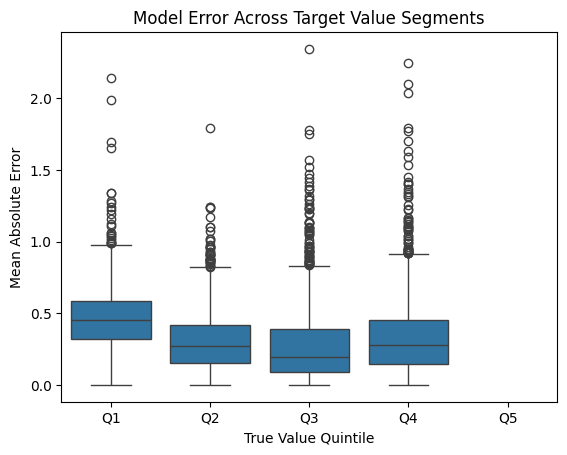

In [322]:
df["group"] = pd.qcut(df["y"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
df["mae"] = abs(df["y"] - df["y_pred"])

# sns.boxplot(x=x, y=y_pred)
df_filtered = df[df["group"] != "Q5"]
sns.boxplot(x="group", y="mae", data=df_filtered)
plt.xlabel("True Value Quintile")
plt.ylabel("Mean Absolute Error")
plt.title("Model Error Across Target Value Segments")
plt.show()

The boxplot at first is very skewed in Q5 and shrinks the other quartiles. This means that there are outliers in Q5 that the boxplot is sensitive to. When I filter out Q5, the distributions for Q2,3,4 are around 0.3 mae, with symmetrical upper and lower std of about 0.17. The model performs consistently across the lower 80% of prices, the errors are more tightly distributed with fewer outliers. 

In [379]:
# Normalize square_feet
sf_mean = apartment_df["square_feet"].mean()
sf_std = apartment_df["square_feet"].std()
apartment_df["square_feet_normalized"] = (apartment_df["square_feet"] - sf_mean) / sf_std
apartment_df["square_feet_normalized"] = apartment_df["square_feet_normalized"].clip(-3, 3)

# Normalize bedrooms
mean = apartment_df["bedrooms"].mean()
std = apartment_df["bedrooms"].std()
apartment_df["bedrooms_normalized"] = (apartment_df["bedrooms"] - mean) / std

# Normalize price
mean = apartment_df["price"].mean()
std = apartment_df["price"].std()
apartment_df["price_normalized"] = (apartment_df["price"] - mean) / std
apartment_df

title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9993                 Five BR 5407 Abbott Place - Abbott   
9994                            Six BR 256 Las Entradas   
9995                        Six BR 9908 Bentcross Drive   
9996                        One BR in New York NY 10069   
9997         Beautiful Lawrenceville Apartment for rent   

                                                   body  \
0     This unit is located at second St NE, Uhland T...   
1     This unit is located at 814 Schutte Road, Evan...   
2     This unit is located at N Scott St, 14th St N,...   
3     This unit is located at 1717 12th Ave, Seattle...   
4     This unit is located at Washington Blvd, N Cle...   
...                                                 ...   
9993  This unit is located at 5407 Abbott Place - Ab...   
9994  This unit is located at 256 Las Entradas, Mont...   
9995  This unit is located at 9908 Bentcross Drive, ...   
9996  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   
9997  Square footage: 880 sq. feet, unit number: 150...   

                                              amenities  bathrooms  bedrooms  \
0                                                   NaN        NaN       0.0   
1                                                   NaN        NaN       1.0   
2                                                   NaN        1.0       0.0   
3                                                   NaN        1.0       0.0   
4                                                   NaN        NaN       0.0   
...                                                 ...        ...       ...   
9993                                                NaN        4.0       5.0   
9994                                                NaN        8.0       6.0   
9995                                                NaN        8.5       6.0   
9996  Basketball,Cable or Satellite,Doorman,Hot Tub,...        NaN       1.0   
9997                                     Gym,Patio/Deck        1.0       1.0   

     pets_allowed  price  square_feet       cityname state  latitude  \
0             NaN    790          101     Washington    DC   38.9057   
1             NaN    425          106     Evansville    IN   37.9680   
2             NaN   1390          107      Arlington    VA   38.8910   
3             NaN    925          116        Seattle    WA   47.6160   
4             NaN    880          125      Arlington    VA   38.8738   
...           ...    ...          ...            ...   ...       ...   
9993          NaN   6000         6300          Edina    MN   44.9000   
9994          NaN  25000         8716      Montecito    CA   34.4331   
9995          NaN  11000        11318        Potomac    MD   39.0287   
9996          NaN   4790        40000       New York    NY   40.7716   
9997          NaN   1009          880  Lawrenceville    GA   34.0072   

      longitude        source  amenity_count  pet_count  \
0      -76.9861     RentLingo              0          0   
1      -87.6621     RentLingo              0          0   
2      -77.0816     RentLingo              0          0   
3     -122.3275     RentLingo              0          0   
4      -77.1055     RentLingo              0          0   
...         ...           ...            ...        ...   
9993   -93.3233     RentLingo              0          0   
9994  -119.6331     RentLingo              0          0   
9995   -77.2409     RentLingo              0          0   
9996   -73.9876      Listanza             10          0   
9997   -84.0034  RentDigs.com              2          0   

      square_feet_normalized  amenity_count_normalized  pet_count_normalized  \
0                

In [403]:
sf = apartment_df["square_feet_normalized"]
br = apartment_df["bedrooms_normalized"]

x = np.column_stack([
    sf,
    br,
    sf * br,
    sf ** 2,
    br ** 2
])

nan_rows = np.isnan(x).any(axis=1)
y = np.array(apartment_df["price_normalized"])

x = x[~nan_rows]
y = y[~nan_rows]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train)

y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 0.01

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.ones(X_train.shape[1], dtype=torch.float64, requires_grad=True)
b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)   


# Gradient descent update loop
for epoch in range(10000):
    # forward pass
    y_pred = X_train @ m + b
    # compute loss
    loss_tensor = (y_pred - y_train) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print(f"epoch: {epoch}, m = {m.tolist()}, b = {b.item():.4f}, loss = {loss.item():.4f}")
        

epoch: 0, m = [0.943922432790664, 0.9220847050357948, 0.8293575829729258, 0.855995449464168, 0.7418632050761398], b = 0.9388, loss = 37.2038
epoch: 20, m = [0.6404779456891694, 0.4851027626207959, 0.07498877252351548, 0.14942185704178912, -0.29944212713999024], b = 0.5606, loss = 1.4069
epoch: 40, m = [0.5835524457696232, 0.38165000113550157, 0.062206847926726566, 0.0752071410657333, -0.2279068006789053], b = 0.4377, loss = 1.1948
epoch: 60, m = [0.5468412368945492, 0.30371332157932146, 0.0645333299004529, 0.03551397521598859, -0.16212907742587768], b = 0.3402, loss = 1.0777
epoch: 80, m = [0.5213569363662595, 0.2410203666383968, 0.06739326241156024, 0.011830411078493386, -0.11419976689302398], b = 0.2610, loss = 1.0074
epoch: 100, m = [0.5036608781439144, 0.19003026641962195, 0.06966919751392016, -0.0014002305571621586, -0.07894879567733165], b = 0.1968, loss = 0.9642
epoch: 120, m = [0.4914846795988689, 0.14823950030180152, 0.07092775600450757, -0.007770565501821521, -0.0525971518351

<Axes: xlabel='square_feet_normalized', ylabel='value'>

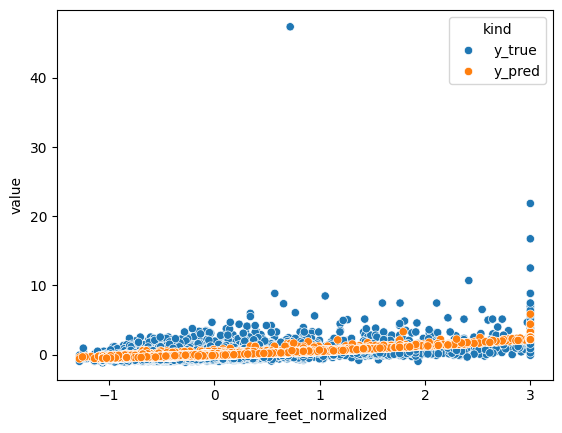

In [407]:
x = X_train.detach().numpy() 
y = y_train.detach().numpy() 
# y_pred = y_pred.detach().numpy() 

df = pd.DataFrame(x, columns=[
    "square_feet_normalized",
    "bedrooms_normalized",
    "sf_times_br",
    "sf_squared",
    "br_squared"
])

df["y_true"] = y_train
df["y_pred"] = y_pred

dfm = df.melt(id_vars="square_feet_normalized", value_vars=["y_true", "y_pred"], var_name="kind", value_name="value")
sns.scatterplot(data=dfm, x="square_feet_normalized", y="value", hue="kind")


# df = pd.DataFrame(np.array([x.detach().numpy(),y.detach().numpy(),y_pred.detach().numpy()]).T,columns=["x","y","y_pred"], index=x.detach().numpy())
# dfm = df.melt("x",var_name="kind")
# sns.scatterplot(data=dfm,x="x",y="value",hue="kind")

<Axes: xlabel='bedrooms_normalized', ylabel='value'>

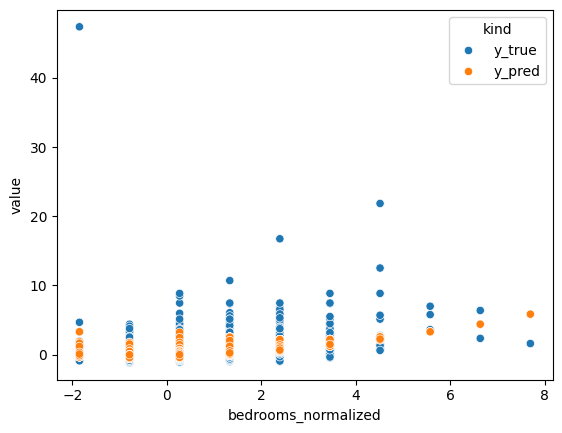

In [412]:
dfm = df.melt(id_vars="bedrooms_normalized", value_vars=["y_true", "y_pred"], var_name="kind", value_name="value")
sns.scatterplot(data=dfm, x="bedrooms_normalized", y="value", hue="kind")

In [411]:
# X_test = torch.tensor(X_test)
with torch.no_grad():
    y_test_pred = X_test @ m + b

y_true = y_test
y_pred = y_test_pred.detach().numpy()

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 0.5142413476466968
MAE: 0.47483685195368924
R²: 0.21931443155337405


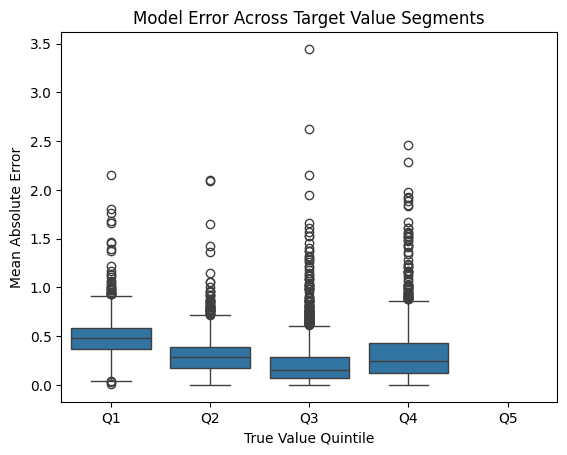

In [413]:
df["group"] = pd.qcut(df["y_true"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
df["mae"] = abs(df["y_true"] - df["y_pred"])

# sns.boxplot(x=x, y=y_pred)
df_filtered = df[df["group"] != "Q5"]
sns.boxplot(x="group", y="mae", data=df_filtered)
plt.xlabel("True Value Quintile")
plt.ylabel("Mean Absolute Error")
plt.title("Model Error Across Target Value Segments")
plt.show()

In [359]:
apartment_df["amenity_count"] = apartment_df["amenities"].apply(
    lambda x: len(x.split(",")) if isinstance(x, str) else 0
)
apartment_df["pet_count"] = apartment_df["pets_allowed"].apply(
    lambda x: len(x.split(",")) if isinstance(x, str) else 0
)
# Normalize square_feet
sf_mean = apartment_df["square_feet"].mean()
sf_std = apartment_df["square_feet"].std()
apartment_df["square_feet_normalized"] = (apartment_df["square_feet"] - sf_mean) / sf_std
apartment_df["square_feet_normalized"] = apartment_df["square_feet_normalized"].clip(-3, 3)

# Normalize amenity_count
mean = apartment_df["amenity_count"].mean()
std = apartment_df["amenity_count"].std()
apartment_df["amenity_count_normalized"] = (apartment_df["amenity_count"] - mean) / std

# Normalize pet_count
mean = apartment_df["pet_count"].mean()
std = apartment_df["pet_count"].std()
apartment_df["pet_count_normalized"] = (apartment_df["pet_count"] - mean) / std

# Normalize price
mean = apartment_df["price"].mean()
std = apartment_df["price"].std()
apartment_df["price_normalized"] = (apartment_df["price"] - mean) / std
apartment_df

title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                     Studio apartment 814 Schutte Road   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
...                                                 ...   
9993                 Five BR 5407 Abbott Place - Abbott   
9994                            Six BR 256 Las Entradas   
9995                        Six BR 9908 Bentcross Drive   
9996                        One BR in New York NY 10069   
9997         Beautiful Lawrenceville Apartment for rent   

                                                   body  \
0     This unit is located at second St NE, Uhland T...   
1     This unit is located at 814 Schutte Road, Evan...   
2     This unit is located at N Scott St, 14th St N,...   
3     This unit is located at 1717 12th Ave, Seattle...   
4     This unit is located at Washington Blvd, N Cle...   
...                                                 ...   
9993  This unit is located at 5407 Abbott Place - Ab...   
9994  This unit is located at 256 Las Entradas, Mont...   
9995  This unit is located at 9908 Bentcross Drive, ...   
9996  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   
9997  Square footage: 880 sq. feet, unit number: 150...   

                                              amenities  bathrooms  bedrooms  \
0                                                   NaN        NaN       0.0   
1                                                   NaN        NaN       1.0   
2                                                   NaN        1.0       0.0   
3                                                   NaN        1.0       0.0   
4                                                   NaN        NaN       0.0   
...                                                 ...        ...       ...   
9993                                                NaN        4.0       5.0   
9994                                                NaN        8.0       6.0   
9995                                                NaN        8.5       6.0   
9996  Basketball,Cable or Satellite,Doorman,Hot Tub,...        NaN       1.0   
9997                                     Gym,Patio/Deck        1.0       1.0   

     pets_allowed  price  square_feet       cityname state  latitude  \
0             NaN    790          101     Washington    DC   38.9057   
1             NaN    425          106     Evansville    IN   37.9680   
2             NaN   1390          107      Arlington    VA   38.8910   
3             NaN    925          116        Seattle    WA   47.6160   
4             NaN    880          125      Arlington    VA   38.8738   
...           ...    ...          ...            ...   ...       ...   
9993          NaN   6000         6300          Edina    MN   44.9000   
9994          NaN  25000         8716      Montecito    CA   34.4331   
9995          NaN  11000        11318        Potomac    MD   39.0287   
9996          NaN   4790        40000       New York    NY   40.7716   
9997          NaN   1009          880  Lawrenceville    GA   34.0072   

      longitude        source  amenity_count  pet_count  \
0      -76.9861     RentLingo              0          0   
1      -87.6621     RentLingo              0          0   
2      -77.0816     RentLingo              0          0   
3     -122.3275     RentLingo              0          0   
4      -77.1055     RentLingo              0          0   
...         ...           ...            ...        ...   
9993   -93.3233     RentLingo              0          0   
9994  -119.6331     RentLingo              0          0   
9995   -77.2409     RentLingo              0          0   
9996   -73.9876      Listanza             10          0   
9997   -84.0034  RentDigs.com              2          0   

      square_feet_normalized  amenity_count_normalized  pet_count_normalized  \
0                

In [363]:
x = np.column_stack([
    apartment_df["square_feet_normalized"],
    apartment_df["pet_count_normalized"],
    apartment_df["amenity_count_normalized"]
])

y = np.array(apartment_df["price_normalized"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 0.01

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.ones(X_train.shape[1], dtype=torch.float64, requires_grad=True) 
b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)   


# Gradient descent update loop
for epoch in range(1000):
    # forward pass
    y_pred = X_train @ m + b
    # compute loss
    loss_tensor = (y_pred - y_train) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print(f"epoch: {epoch}, m = {m.tolist()}, b = {b.item():.4f}, loss = {loss.item():.4f}")

epoch: 0, m = [0.9980912053350165, 0.974777845979083, 0.9760662089119501], b = 0.9806, loss = 4.4415
epoch: 20, m = [0.9552859773594072, 0.5794539655998745, 0.6022574811840918], b = 0.6636, loss = 2.3428
epoch: 40, m = [0.9091175193534822, 0.3354894472509525, 0.3727816114808998], b = 0.4515, loss = 1.5042
epoch: 60, m = [0.8645314170765827, 0.18498527975837542, 0.23131447105590014], b = 0.3095, loss = 1.1634
epoch: 80, m = [0.8238843540433418, 0.09223414858163848, 0.1435656983417471], b = 0.2143, loss = 1.0217
epoch: 100, m = [0.7880728347140183, 0.035192045810926116, 0.08866413780876861], b = 0.1505, loss = 0.9608
epoch: 120, m = [0.7572009472548639, 0.00023558648831958256, 0.05390647079483536], b = 0.1077, loss = 0.9336
epoch: 140, m = [0.7309701894713088, -0.021063453954863094, 0.03155796357469183], b = 0.0789, loss = 0.9208
epoch: 160, m = [0.7089026675326167, -0.03392437181010176, 0.016904716225895684], b = 0.0596, loss = 0.9144
epoch: 180, m = [0.6904651800132093, -0.041581921110

<Axes: xlabel='square_feet', ylabel='value'>

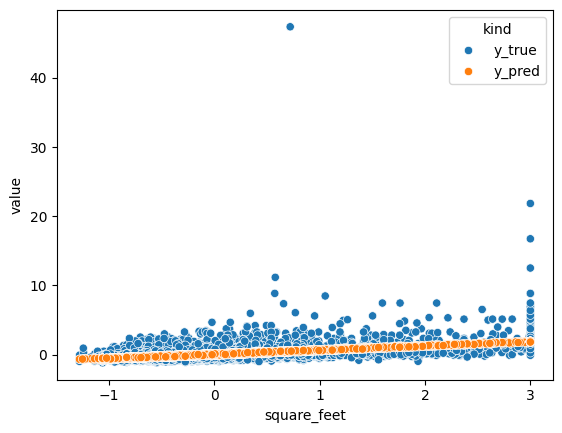

In [364]:
x = X_train.detach().numpy() 
y = y_train.detach().numpy() 
y_pred = y_pred.detach().numpy() 

df = pd.DataFrame(x, columns=["square_feet", "pet_count", "amenity_count"])
df["y_true"] = y_train
df["y_pred"] = y_pred

dfm = df.melt(id_vars="square_feet", value_vars=["y_true", "y_pred"], var_name="kind", value_name="value")
sns.scatterplot(data=dfm, x="square_feet", y="value", hue="kind")


# df = pd.DataFrame(np.array([x.detach().numpy(),y.detach().numpy(),y_pred.detach().numpy()]).T,columns=["x","y","y_pred"], index=x.detach().numpy())
# dfm = df.melt("x",var_name="kind")
# sns.scatterplot(data=dfm,x="x",y="value",hue="kind")

<Axes: xlabel='pet_count', ylabel='value'>

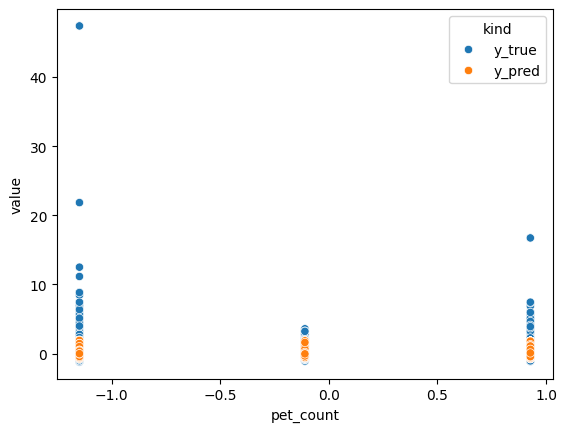

In [366]:
dfm = df.melt(id_vars="pet_count", value_vars=["y_true", "y_pred"], var_name="kind", value_name="value")
sns.scatterplot(data=dfm, x="pet_count", y="value", hue="kind")

<Axes: xlabel='amenity_count', ylabel='value'>

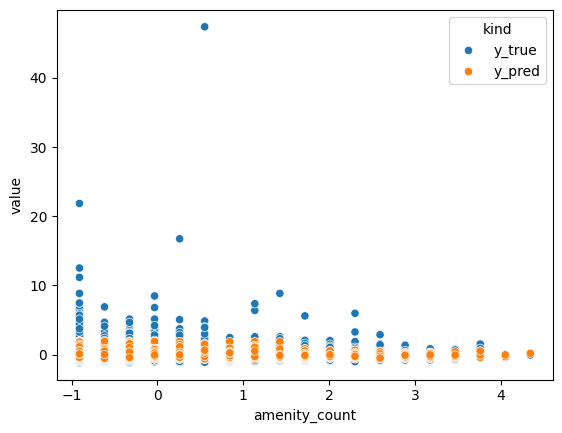

In [367]:
dfm = df.melt(id_vars="amenity_count", value_vars=["y_true", "y_pred"], var_name="kind", value_name="value")
sns.scatterplot(data=dfm, x="amenity_count", y="value", hue="kind")

In [349]:
# X_test = torch.tensor(X_test)
with torch.no_grad():
    y_test_pred = X_test @ m + b

y_true = y_test
y_pred = y_test_pred.detach().numpy()

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 0.9744448764415344
MAE: 0.47925216197752274
R²: -0.6164322818248376


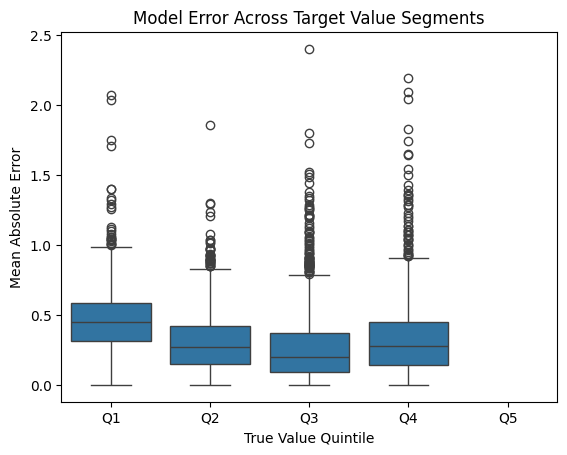

In [350]:
df["group"] = pd.qcut(df["y_true"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
df["mae"] = abs(df["y_true"] - df["y_pred"])

# sns.boxplot(x=x, y=y_pred)
df_filtered = df[df["group"] != "Q5"]
sns.boxplot(x="group", y="mae", data=df_filtered)
plt.xlabel("True Value Quintile")
plt.ylabel("Mean Absolute Error")
plt.title("Model Error Across Target Value Segments")
plt.show()

In [378]:
x = np.column_stack([
    apartment_df["square_feet"],
    apartment_df["pet_count"],
    apartment_df["amenity_count"]
])

y = np.array(apartment_df["price"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float64)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 1e-7

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.ones(X_train.shape[1], dtype=torch.float64, requires_grad=True) 
b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)   


# Gradient descent update loop
for epoch in range(1000000):
    # forward pass
    y_pred = X_train @ m + b
    # compute loss
    loss_tensor = (y_pred - y_train) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print(f"epoch: {epoch}, m = {m.tolist()}, b = {b.item():.4f}, loss = {loss.item():.4f}")

epoch: 0, m = [1.101863054963741, 1.0001099421855464, 1.0003206417104276], b = 1.0001, loss = 1301146.8081
epoch: 20, m = [1.430557675958734, 1.0007890129566641, 1.002858647721987], b = 1.0009, loss = 1081078.2778
epoch: 40, m = [1.432071801252567, 1.0011770426818158, 1.004654542702409], b = 1.0015, loss = 1081071.7450
epoch: 60, m = [1.4320739699578984, 1.001563712618246, 1.0064468930946002], b = 1.0020, loss = 1081069.9120
epoch: 80, m = [1.432069151934689, 1.001950361433328, 1.0082391119473078], b = 1.0026, loss = 1081068.0792
epoch: 100, m = [1.4320643019053074, 1.002336995314153, 1.0100312150400685], b = 1.0031, loss = 1081066.2467
epoch: 120, m = [1.4320594520086947, 1.0027236142901927, 1.0118232024530573], b = 1.0037, loss = 1081064.4144
epoch: 140, m = [1.4320546023933518, 1.003110218362465, 1.0136150741939007], b = 1.0042, loss = 1081062.5823
epoch: 160, m = [1.4320497530599483, 1.0034968075318549, 1.015406830269889], b = 1.0048, loss = 1081060.7504
epoch: 180, m = [1.43204490

In [1]:
def thresholded_accuracy(y_true, y_pred, T):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    std_dev = np.std(y_true)
    within_threshold = np.abs(y_pred - y_true) <= T * std_dev
    accuracy = np.mean(within_threshold)
    
    return accuracy

In [100]:
relevant_columns = ["square_feet", "price", "bedrooms"]
apartment_df = apartment_df.dropna(subset=relevant_columns)
sf_mean = apartment_df["square_feet"].mean()
sf_std = apartment_df["square_feet"].std()
apartment_df["square_feet_normalized"] = (apartment_df["square_feet"] - sf_mean) / sf_std


# Normalize bedrooms
mean = apartment_df["bedrooms"].mean()
std = apartment_df["bedrooms"].std()
apartment_df["bedrooms_normalized"] = (apartment_df["bedrooms"] - mean) / std

# Normalize price
mean = apartment_df["price"].mean()
std = apartment_df["price"].std()
apartment_df["price_normalized"] = (apartment_df["price"] - mean) / std


apartment_df["amenity_count"] = apartment_df["amenities"].apply(
    lambda x: len(x.split(",")) if isinstance(x, str) else 0
)
apartment_df["pet_count"] = apartment_df["pets_allowed"].apply(
    lambda x: len(x.split(",")) if isinstance(x, str) else 0
)

# Normalize amenity_count
mean = apartment_df["amenity_count"].mean()
std = apartment_df["amenity_count"].std()
apartment_df["amenity_count_normalized"] = (apartment_df["amenity_count"] - mean) / std

# Normalize pet_count
mean = apartment_df["pet_count"].mean()
std = apartment_df["pet_count"].std()
apartment_df["pet_count_normalized"] = (apartment_df["pet_count"] - mean) / std

C:\Users\brock\AppData\Local\Temp\ipykernel_34332\2537248053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_df["square_feet_normalized"] = (apartment_df["square_feet"] - sf_mean) / sf_std
C:\Users\brock\AppData\Local\Temp\ipykernel_34332\2537248053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_df["bedrooms_normalized"] = (apartment_df["bedrooms"] - mean) / std
C:\Users\brock\AppData\Local\Temp\ipykernel_34332\2537248053.py:16: SettingWithCopyWarning: 
A value is trying to be 

In [101]:
x = np.array(apartment_df["square_feet_normalized"])
y = np.array(apartment_df["price_normalized"])



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float64)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)


# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 0.01

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)
b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)   

# Gradient descent update loop
for epoch in range(1000):
    # forward pass
    y_pred = m*X_train + b
    # compute loss
    loss_tensor = (y_pred - y_train) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:

        print("epoch:", epoch, "m=", m.item(), "b=", b.item(), "loss=", loss.item())

epoch: 0 m= 0.9901272060391852 b= 0.9800817414095652 loss= 2.111262724143004
epoch: 20 m= 0.8276786275149918 b= 0.6556725372574999 loss= 1.424038054050109
epoch: 40 m= 0.7169566632882377 b= 0.4390993846326417 loss= 1.1151616004125025
epoch: 60 m= 0.6414904680893311 b= 0.29451684177290505 loss= 0.9762964087676411
epoch: 80 m= 0.5900539078588647 b= 0.1979947148035867 loss= 0.91384711404825
epoch: 100 m= 0.5549955027317328 b= 0.133557362312316 loss= 0.8857546242356785
epoch: 120 m= 0.5311001662080594 b= 0.09053955509869077 loss= 0.8731135353893177
epoch: 140 m= 0.5148133989631498 b= 0.06182126222631421 loss= 0.8674235220400338
epoch: 160 m= 0.5037125202834903 b= 0.04264920408446405 loss= 0.8648615191704502
epoch: 180 m= 0.4961462729200797 b= 0.029850128151810852 loss= 0.8637075707014974
epoch: 200 m= 0.4909891864532268 b= 0.021305596757578083 loss= 0.8631876505888519
epoch: 220 m= 0.48747415694969126 b= 0.01560135879193502 loss= 0.8629533177753944
epoch: 240 m= 0.4850783368385478 b= 0.011

In [102]:
with torch.no_grad():
    y_test_pred = m * X_test + b

Single_y_true = y_test
Single_y_pred = y_test_pred.detach().numpy()
# results_df["Single_y_true"] = Single_y_true
# results_df["Single_y_pred"] = Single_y_pred


In [103]:
x = np.column_stack([
    apartment_df["square_feet_normalized"],
    apartment_df["pet_count_normalized"],
    apartment_df["amenity_count_normalized"]
])



# y = np.array(apartment_df["price_normalized"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float64)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test, dtype=torch.float64)
y_test = torch.tensor(y_test, dtype=torch.float64)


# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 0.01

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.ones(X_train.shape[1], dtype=torch.float64, requires_grad=True) 
b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)   


# Gradient descent update loop
for epoch in range(1000):
    # forward pass
    y_pred = X_train @ m + b
    # compute loss
    loss_tensor = (y_pred - y_train) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print(f"epoch: {epoch}, m = {m.tolist()}, b = {b.item():.4f}, loss = {loss.item():.4f}")

epoch: 0, m = [0.9928397978934602, 0.9745073619869019, 0.9765782748994714], b = 0.9801, loss = 4.5709
epoch: 20, m = [0.8649821219932663, 0.5756245713281182, 0.6090734950113793], b = 0.6557, loss = 2.3830
epoch: 40, m = [0.7647804173868705, 0.33057292960477636, 0.38077524231944], b = 0.4391, loss = 1.4938
epoch: 60, m = [0.6883205615818907, 0.18034656197535218, 0.23788328493213495], b = 0.2945, loss = 1.1275
epoch: 80, m = [0.6310499588330322, 0.08854229842791675, 0.14766120009433284], b = 0.1979, loss = 0.9744
epoch: 100, m = [0.5887199774178529, 0.03269242097877565, 0.09012327342389398], b = 0.1335, loss = 0.9096
epoch: 120, m = [0.5577353899717394, -0.0010710193928353483, 0.053017843411508656], b = 0.0904, loss = 0.8817
epoch: 140, m = [0.5352163823785336, -0.02130490310532902, 0.02879643220920893], b = 0.0617, loss = 0.8695
epoch: 160, m = [0.5189347356830399, -0.033284365617426065, 0.012779853221248276], b = 0.0425, loss = 0.8641
epoch: 180, m = [0.5072063369863129, -0.04025628825

In [104]:
with torch.no_grad():
    m = torch.tensor([1.3459607825655933, 11.536477836522907, 26.747755333745346], dtype=torch.float64)
    b = torch.tensor(23.9051, dtype=torch.float64)
    y_test_pred = X_test @ m + b

Multiple_y_true = y_test
Multiple_y_pred = y_test_pred.detach().numpy()

In [105]:
sf = apartment_df["square_feet_normalized"]
br = apartment_df["bedrooms_normalized"]
x = np.column_stack([
    sf,
    br,
    sf * br,
    sf ** 2,
    br ** 2
])




X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train)

y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Define learning rate
# lr = 2 / (torch.norm(x)*x.shape[0])
lr = 0.01

# Initialize parameters (initializing them small usually helps)
# making sure to tell pytorch these are the variables we will be taking the gradient over

m = torch.ones(X_train.shape[1], dtype=torch.float64, requires_grad=True)
b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)   


# Gradient descent update loop
for epoch in range(10000):
    # forward pass
    y_pred = X_train @ m + b
    # compute loss
    loss_tensor = (y_pred - y_train) ** 2
    loss = loss_tensor.mean()
    # compute the gradient of our loss function
    loss.backward()

    with torch.no_grad(): # don't need to include this computation in our gradient
        # update our parameters by using the learning rate to define step size
        m -= m.grad * lr
        b -= b.grad * lr
        # reset our gradients
        m.grad.zero_()
        b.grad.zero_()

    if epoch%20 == 0:
        print(f"epoch: {epoch}, m = {m.tolist()}, b = {b.item():.4f}, loss = {loss.item():.4f}")

epoch: 0, m = [0.8683788730119202, 0.8943612667112409, 0.5790078142477819, 0.28366050395377906, 0.6491624714978936], b = 0.9266, loss = 87.0178
epoch: 20, m = [0.6237413816066909, 0.5336068332073691, 0.03506145488326949, -0.0710862528382443, -0.1305697786350776], b = 0.6110, loss = 1.4789
epoch: 40, m = [0.5443866319178647, 0.39189352232115254, 0.012000408209513041, 0.006451719569553089, -0.19803920404156927], b = 0.4697, loss = 1.1482
epoch: 60, m = [0.48980436970512703, 0.2998542909007219, 0.012886811971079602, 0.02519295594394265, -0.18035602334701595], b = 0.3688, loss = 1.0326
epoch: 80, m = [0.450756522074911, 0.23276941882552954, 0.014454048208474924, 0.03166668918704117, -0.14967606716614884], b = 0.2890, loss = 0.9641
epoch: 100, m = [0.42251169806973876, 0.18154588584613218, 0.012892574598528966, 0.035730770795985134, -0.1202474701156741], b = 0.2242, loss = 0.9207
epoch: 120, m = [0.40212486675324727, 0.14153102783177793, 0.008273323387760944, 0.039433832127273395, -0.094298

In [106]:
with torch.no_grad():
    y_test_pred = X_test @ m + b

Nonlinear_y_true = y_test
Nonlinear_y_pred = y_test_pred.detach().numpy()

In [107]:
print(len(Single_y_true), len(Single_y_pred), len(Multiple_y_true), len(Multiple_y_pred), len(Nonlinear_y_true), len(Nonlinear_y_pred))


1992 1992 1992 1992 1992 1992


In [108]:
results_df = pd.DataFrame({ 
    "Single_y_true": Single_y_true, 
    "Single_y_pred": Single_y_pred, 
    "Multiple_y_true": Multiple_y_true, 
    "Multiple_y_pred": Multiple_y_pred, 
    "Nonlinear_y_true": Nonlinear_y_true, 
    "Nonlinear_y_pred": Nonlinear_y_pred })

In [109]:
thresholds = [0.25, 0.5, 1.0]
models = ["Single", "Multiple", "Nonlinear"]

accuracy_data = {
    "Model": [],
    "T=0.25": [],
    "T=0.5": [],
    "T=1.0": []
}

for model in models:
    y_true = results_df[f"{model}_y_true"]
    y_pred = results_df[f"{model}_y_pred"]
    
    accuracy_data["Model"].append(model)
    for T in thresholds:
        acc = thresholded_accuracy(y_true, y_pred, T)
        accuracy_data[f"T={T}"].append(acc)

testing_accuracy_df = pd.DataFrame(accuracy_data)

In [110]:
testing_accuracy_df

Model    T=0.25     T=0.5     T=1.0
0     Single  0.287149  0.574297  0.862952
1   Multiple  0.001506  0.003012  0.009036
2  Nonlinear  0.285643  0.568775  0.875000

The nonlinear and single models perform similarly, whereas multiple models lags behind significantly. I think that the multiple models is lagging because of poor features such as pet counts and amenities counts. I think that bedrooms and square feet are strong features. 

In [135]:
from sklearn.model_selection import KFold

thresholds = [0.25, 0.5, 1.0]
models = ["Single", "Multiple", "Nonlinear"]
results = {model: {T: [] for T in thresholds} for model in models}

X_single = apartment_df[["square_feet_normalized"]].values
X_multiple = apartment_df[["square_feet_normalized", "pet_count_normalized", "amenity_count_normalized"]].values
X_nonlinear = apartment_df[["square_feet_normalized", "bedrooms_normalized"]]
sf = apartment_df["square_feet_normalized"].values.reshape(-1, 1)
br = apartment_df["bedrooms_normalized"].values.reshape(-1, 1)
sf_sq = sf ** 2
br_sq = br ** 2
sf_br = sf * br
X_nonlinear = np.hstack([sf, br, sf_sq, br_sq, sf_br])

y_all = apartment_df["price_normalized"].values
y_multiple = apartment_df["price_normalized"].values
y_nonlinear = apartment_df["price_normalized"].values


kf_single = KFold(n_splits=5, shuffle=True, random_state=42)
kf_multiple = KFold(n_splits=5, shuffle=True, random_state=42)
kf_nonlinear = KFold(n_splits=5, shuffle=True, random_state=42)




In [136]:
def train_linear_model(X, y):
    X = torch.tensor(X, dtype=torch.float64)
    y = torch.tensor(y, dtype=torch.float64)
    m = torch.ones(X.shape[1], dtype=torch.float64, requires_grad=True)
    b = torch.tensor(1.0, dtype=torch.float64, requires_grad=True)
    lr = 0.01
    for _ in range(1000):
        y_pred = X @ m + b
        loss = ((y_pred - y) ** 2).mean()
        loss.backward()
        with torch.no_grad():
            m -= lr * m.grad
            b -= lr * b.grad
            m.grad.zero_()
            b.grad.zero_()
    return m.detach(), b.detach()



In [137]:
for (model, X, y, kf) in [
    ("Single", X_single, y_all, kf_single),
    ("Multiple", X_multiple, y_multiple, kf_multiple),
    ("Nonlinear", X_nonlinear, y_nonlinear, kf_nonlinear)
]:
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        m, b = train_linear_model(X_train, y_train)
        with torch.no_grad():
            X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
            y_pred = X_test_tensor @ m + b
            y_pred_np = y_pred.numpy()
        for T in thresholds:
            acc = thresholded_accuracy(y_test, y_pred_np, T)
            results[model][T].append(acc)

# Aggregate results
summary = {
    "Model": [],
    "T=0.25 (mean ± std)": [],
    "T=0.5 (mean ± std)": [],
    "T=1.0 (mean ± std)": []
}

for model in models:
    summary["Model"].append(model)
    for T in thresholds:
        accs = results[model][T]
        mean = np.mean(accs)
        std = np.std(accs)
        summary[f"T={T} (mean ± std)"].append(f"{mean:.3f} ± {std:.3f}")

# Final DataFrame
cv_accuracy_df = pd.DataFrame(summary)

In [138]:
cv_accuracy_df

Model T=0.25 (mean ± std) T=0.5 (mean ± std) T=1.0 (mean ± std)
0     Single       0.341 ± 0.080      0.638 ± 0.104      0.894 ± 0.033
1   Multiple       0.338 ± 0.083      0.640 ± 0.100      0.895 ± 0.034
2  Nonlinear       0.342 ± 0.083      0.643 ± 0.105      0.902 ± 0.028

The single and nonlinear outputs were similar to each other again, however they were slightly higher for each column. The multiple row was significantly higher than without the cross validation. AI disclaimer, I did use AI to understand and figure out how to use the cross validation tools to determine this output. I think that in my prior modeling, I might've had outliers that might've confused the multiple features model, possibly leading to extremely low accuracy. However, I don't think that cross validation could've stablized the accuracy this much for multiple features model. 